# Description of the Sign-Language MNIST Problem (American Sign Language)

## Author: Spriha Ghosh

Sign Language is a unique type of communication that often goes understudied. While the translation process between signs and a spoken or written language is formally called ‘interpretation,’ the function that interpreting plays is the same as that of translation for a spoken language. 

$\color{red}{\text{In our project, we look at American Sign Language (ASL), which is used in the USA and in English-speaking Canada and has many different }}$

$\color{red}{\text{dialects. There are 22 handshapes that correspond to the 26 letters of the alphabet, and you can sign the 10 digits on one hand.}}$


<font color='blue'>**The use of depth-sensing technology is quickly growing in popularity, and other tools have been incorporated into the process that have proven successful. Developments such as custom-designed color gloves have been used to facilitate the recognition process and make the feature extraction step more efficient by making certain gestural units easier to identify and classify**</font>

<font color='green'>**Until recently, however, methods of automatic sign language recognition weren’t able to make use of the depth-sensing technology that is as widely available today. Previous works made use of very basic camera technology to generate datasets of simply images, with no depth or contour information available, just the pixels present.**</font> 

A | B | C
- | - | -
![alt](https://c.tenor.com/CoBDQZxkNRYAAAAC/asl-sign-language.gif) | ![alt](https://c.tenor.com/Ee-t11TCPuwAAAAC/understand-signtime.gif) | ![alt](https://c.tenor.com/wWR8t03Yx5wAAAAC/no-sign-language.gif)



## Importing the Essential Libraries

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sign-language-mnist/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/amer_sign2.png
/kaggle/input/sign-language-mnist/amer_sign3.png
/kaggle/input/sign-language-mnist/sign_mnist_train.csv
/kaggle/input/sign-language-mnist/american_sign_language.PNG
/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

# Loading the ASL dataset

In [4]:
train_df = pd.read_csv("../input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv")
test_df = pd.read_csv("../input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv")

In [44]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


# Exploratory Data Analysis(EDA)

![alt](https://2.bp.blogspot.com/-kuTY54z70KE/WJs5MW735qI/AAAAAAAAG7c/kfeK6bzIHIEeQgME1j-e-RfzlC0vse3igCLcB/s1600/SignLanguage.gif)

In [6]:
train_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [7]:
train_df.head(7)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,...,76,74,68,62,53,55,48,238,255,255
6,8,134,134,135,135,136,137,137,138,138,...,109,102,91,65,138,189,179,181,181,179


In [8]:
test = pd.read_csv("../input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv")
y = test['label']

In [11]:
y_train = train_df['label']
y_test = test_df['label']
del train_df['label']
del test_df['label']

## Data Preprocessing

In [12]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [14]:
x_train = train_df.values
x_test = test_df.values

### (a) Normalize the Data

In [15]:
x_train = x_train / 255
x_test = x_test / 255

### (b)Reshaping the data from 1-D to 3-D as required through input by CNN's

In [16]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

Text(0.5, 1.0, 'Frequency of each label')

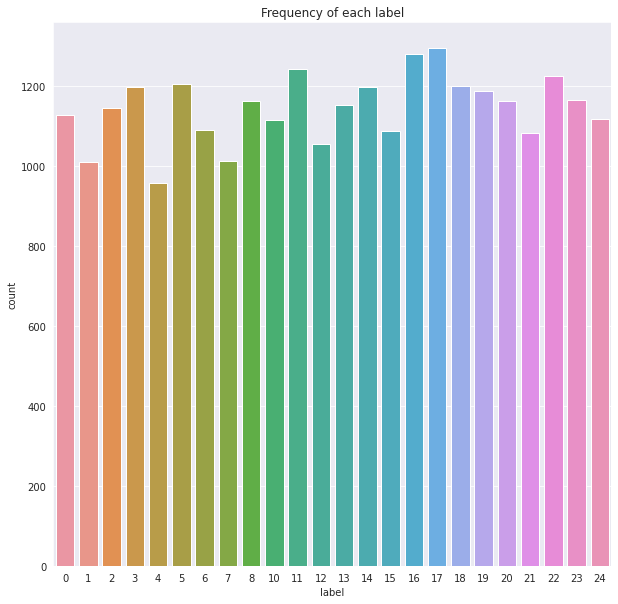

In [10]:
plt.figure(figsize = (10,10)) # Label Count
sns.set_style("darkgrid")
sns.countplot(train_df['label'])
plt.title("Frequency of each label")

Text(0.5, 1.0, 'label: 13  letter: M')

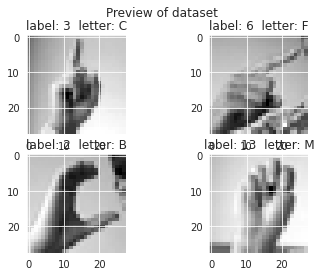

In [54]:
fig,axe=plt.subplots(2,2)
fig.suptitle('Preview of dataset')
axe[0,0].imshow(x_train[0].reshape(28,28),cmap='gray')
axe[0,0].set_title('label: 3  letter: C')
axe[0,1].imshow(x_train[1].reshape(28,28),cmap='gray')
axe[0,1].set_title('label: 6  letter: F')
axe[1,0].imshow(x_train[2].reshape(28,28),cmap='gray')
axe[1,0].set_title('label: 2  letter: B')
axe[1,1].imshow(x_train[4].reshape(28,28),cmap='gray')
axe[1,1].set_title('label: 13  letter: M')

# Data Augmentation
<font color='green'>**In order to avoid overfitting problem, we need to expand artificially our dataset. We can make your existing dataset even larger. The idea is to alter the training data with small transformations to reproduce the variations.**</font>

<font color='green'>**Approaches that alter the training data in ways that change the array representation while keeping the label the same are known as data augmentation techniques. Some popular augmentations people use are grayscales, horizontal flips, vertical flips, random crops, color jitters, translations, rotations, and much more.**</font>

<font color='green'>**By applying just a couple of these transformations to our training data, we can easily double or triple the number of training examples and create a very robust model.**</font>

In [29]:
# With data augmentation to prevent overfitting

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

For the data augmentation, i choosed to :

Randomly rotate some training images by 10 degrees
Randomly Zoom by 10% some training images
Randomly shift images horizontally by 10% of the width
Randomly shift images vertically by 10% of the height
I did not apply a vertical_flip nor horizontal_flip since it could have lead to misclassify.

Once our model is ready, we fit the training dataset .

In [56]:
 checkpoint_filepath = 'best_model.hdf5'

callback_checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=False, monitor='val_accuracy', mode='max', save_best_only=True)
callback_learningrate = ReduceLROnPlateau(monitor='loss', mode='min', min_delta=0.01, patience=3, factor=.75, min_lr=0.00001, verbose=1)

callbacks = [callback_checkpoint, callback_learningrate]

# Convolution Neural Networks

CNNs are a deep learning algorithm that takes in an input image and assigns importance to various aspects in the image. It captures the spatial and temporal dependencies of the image. Each CNN layer learn filters of increasing complexity.

- **The first layers learn basic feature detection filters like edges, corners.**
- **The middle layer learn filters that detect parts of objects.**
- **The last layers have higher representationsthey learn to recognize full objects in different shapes and positions.**

<font color='blue'>**We experimented by building a deep CNN for the purpose of classification. The overview of our architecture is we have Convolutional layers to learn the features of the images, each followed by Max Pool layers to reduce the number of parameters to learn and also to help in translation invariance.**</font>  
* **The Network takes an input image, and uses a filter (or kernel) to create a feature map describing the image.**
* **In the convolution operation, we take a filter (usually 2x2 or 3x3 matrix ) and slide it over the image matrix. The coresponding numbers in both matrices are multiplied and and added to yield a single number describing that input space. This process is repeated all over the image.This working can be seen in the following figure**
![ChessUrl](https://brandinho.github.io/images/ConvNet.gif "chess")

In [37]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [41]:
model=Sequential()
model.add(Conv2D(128,kernel_size=(5,5),
                 strides=1,padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(3,3),strides=2,padding='same'))
model.add(Conv2D(64,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))
model.add(Conv2D(32,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))
          
model.add(Flatten())

In [42]:
model.add(Dense(units=512,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=24,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        32832     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 32)          8224      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)              

## Model Optimization

**Adam provides an optimization algorithm that can handle sparse gradients on noisy problems. We chose Adam because it is
computationally effective and requires little memory space.**

In [44]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [45]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 128) ,epochs = 20 , validation_data = (x_test, y_test) , callbacks = [learning_rate_reduction])

Epoch 1/20
215/215 [==============================] - 11s 52ms/step - loss: 2.2382 - accuracy: 0.3146 - val_loss: 0.9701 - val_accuracy: 0.6847
Epoch 2/20
215/215 [==============================] - 8s 38ms/step - loss: 0.8344 - accuracy: 0.7199 - val_loss: 0.3737 - val_accuracy: 0.8744
Epoch 3/20
215/215 [==============================] - 8s 36ms/step - loss: 0.4730 - accuracy: 0.8424 - val_loss: 0.2358 - val_accuracy: 0.9241
Epoch 4/20
215/215 [==============================] - 8s 39ms/step - loss: 0.2994 - accuracy: 0.9003 - val_loss: 0.1570 - val_accuracy: 0.9579
Epoch 5/20
215/215 [==============================] - 8s 38ms/step - loss: 0.2151 - accuracy: 0.9288 - val_loss: 0.1247 - val_accuracy: 0.9633
Epoch 6/20
215/215 [==============================] - 8s 36ms/step - loss: 0.1548 - accuracy: 0.9482 - val_loss: 0.0993 - val_accuracy: 0.9720
Epoch 7/20
215/215 [==============================] - 8s 37ms/step - loss: 0.1200 - accuracy: 0.9620 - val_loss: 0.0885 - val_accuracy: 0.977

In [47]:
(ls,acc)=model.evaluate(x=x_test,y=y_test)

7172/7172 [==============================] - 1s 81us/step


In [48]:
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

7172/7172 [==============================] - 1s 77us/step
Accuracy of the model is -  99.23312664031982 %


# Data Evaluation and Analysis

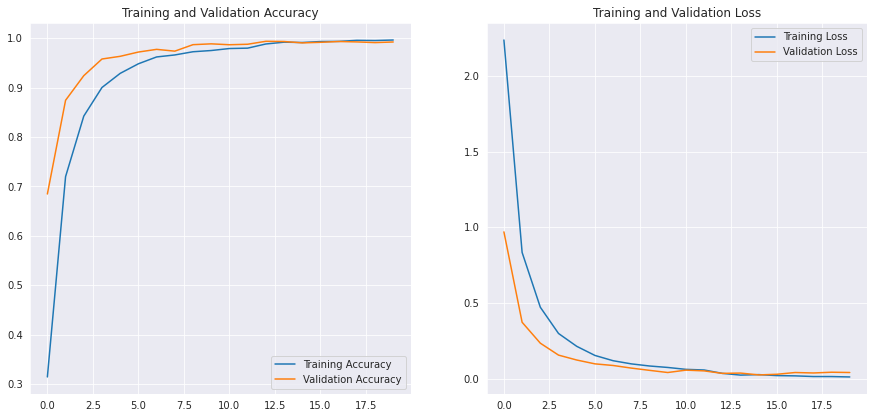

In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [60]:
size  = 28
channels = 1
df_test = pd.read_csv('../input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv')
y_test = df_test['label']
df_test.drop(['label'], axis=1, inplace=True)
x_test = df_test.values.reshape(df_test.shape[0], size, size, channels)

In [63]:
y_pred = np.argmax(model.predict(x_test),axis = 1)

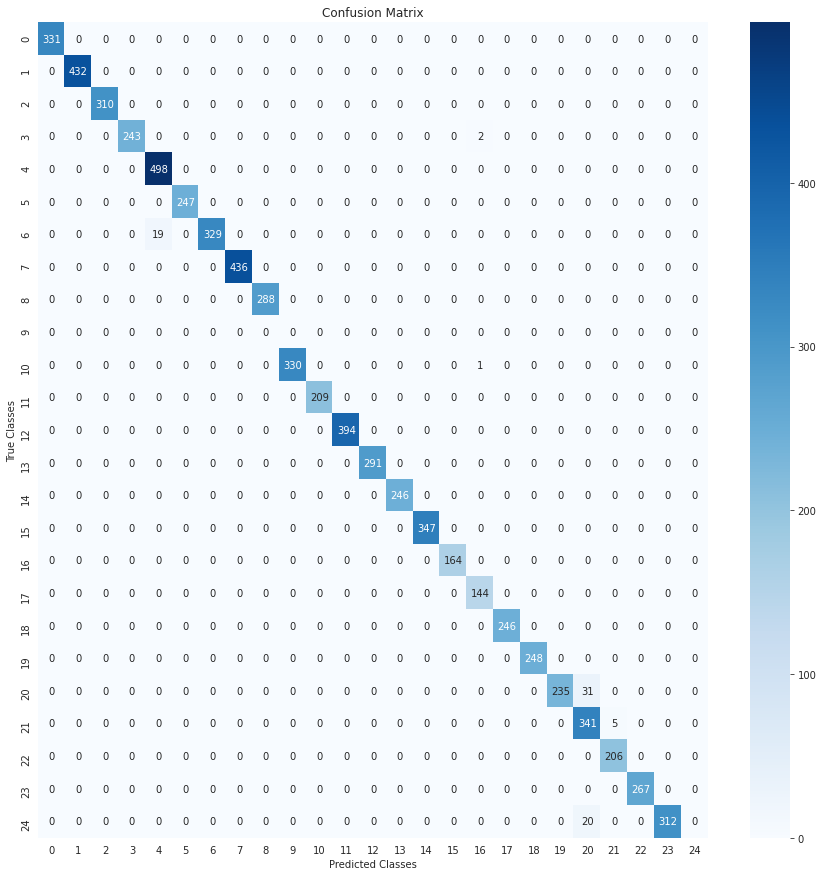

In [64]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (15,15))
sns.heatmap(CM, annot=True, cmap="Blues", fmt = 'g')
plt.xlabel("Predicted Classes")
plt.ylabel("True Classes")
plt.title("Confusion Matrix")
plt.show()

# Visualize the Predictions

In [ ]:
plt.figure(figsize=(20,20))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i],cmap='gray')
    plt.ylabel(f"True: {alphabet[y_test[i]]}")
    plt.xlabel(f"Predicted: {alphabet[y_pred[i]]}")
    
plt.show()

<img style="float: left;" src="asl.png">

## Conclusion and Future Work
<font color='purple'>**We observed 99.32% accuracy on the alphabet gestures, and 99.16% validation set accuracy on digits, when using the MNIST ASL dataset.**</font>

<font color='purple'>**In recognizing that classification is a limited goal, we plan on incorporating structured PGMs in future implementations of this classification schema that would describe the probability distributions of the different letters’ occurrences based on their sequential contexts.**</font>

<font color='purple'>**We also recognize that the representation itself makes a huge difference in the performance of algorithms like ours, so we hope to find the best representation of our data, and building off our results from this research, incorporate it into a zero-shot learning process.**</font>